In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.special import softmax
from sklearn.metrics import f1_score

In [3]:
# Load data 
data_name = 'amlsim_mixed' #'elliptic'
ext_rate = 0.4

hetero_gat = np.load(f'outputs/{data_name}/baseline_hetero_GAT_ext_{ext_rate}.npz')
hetero_sage = np.load(f'outputs/{data_name}/baseline_hetero_SAGE_ext_{ext_rate}.npz')
hetero_gin = np.load(f'outputs/{data_name}/baseline_hetero_GIN_ext_{ext_rate}.npz')
hetero_hgt = np.load(f'outputs/{data_name}/baseline_hetero_HGT_ext_{ext_rate}.npz')
hetero_han = np.load(f'outputs/{data_name}/baseline_hetero_HAN_ext_{ext_rate}.npz')
hetero_mlp = np.load(f'outputs/{data_name}/baseline_homo_MLP_ext_{ext_rate}.npz')
ahead = np.load(f'outputs/{data_name}/baseline_hetero_AHEAD_ext_{ext_rate}.npz')
gsmote = np.load(f'outputs/{data_name}/baseline_hetero_SAGE-SMOTE_ext_{ext_rate}.npz')
knn = np.load(f'outputs/{data_name}/baseline_KNN_ext_{ext_rate}.npz')


In [4]:
# Record scores 
true = hetero_gat['true'][hetero_gat['test_mask']]
scores_gat = hetero_gat['pred_scores'][hetero_gat['test_mask']][:,1]
scores_sage = hetero_sage['pred_scores'][hetero_sage['test_mask']][:,1]
scores_gin = hetero_gin['pred_scores'][hetero_gin['test_mask']][:,1]
scores_hgt = hetero_gin['pred_scores'][hetero_hgt['test_mask']][:,1]
scores_han = hetero_gin['pred_scores'][hetero_han['test_mask']][:,1]
scores_mlp = hetero_mlp['pred_scores'][hetero_mlp['test_mask']][:,1]
source_ahead = ahead['pred_scores'][hetero_gat['test_mask']]
source_gsmote = gsmote['pred_scores'][gsmote['test_mask']][:,1]
source_knn = knn['pred_scores'][hetero_gat['test_mask']][:,1]

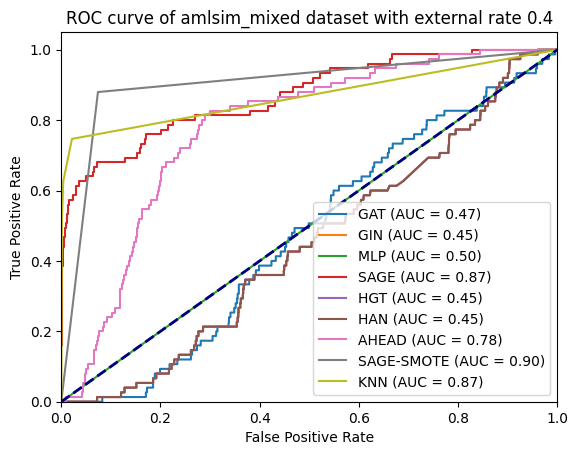

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the true labels
true_labels = true

# Define the predicted scores
predicted_scores = [scores_gat, scores_gin, scores_mlp, scores_sage, scores_hgt, scores_han,source_ahead, source_gsmote, source_knn]

# Define the labels for each score
labels = ['GAT', 'GIN', 'MLP', 'SAGE', 'HGT' , 'HAN' , 'AHEAD', 'SAGE-SMOTE', 'KNN']

# Plot ROC curve for each score
plt.figure()
for i, scores in enumerate(predicted_scores):
    fpr, tpr, thresholds = roc_curve(true_labels, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve of {data_name} dataset with external rate {ext_rate}')
plt.legend(loc="lower right")
plt.show()